# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/tanuprabhu/linear-regression-dataset

**Task:**

Linear Regression


**Datasets**

Context
The reason behind providing the data-set is that currently I'm doing my Master's in Computer Science, in my second semester I have chosen Data Science class, so in this class they are teaching me Linear Regression, so I decided to provide a set of x and y values, which not only helps me and also helps others.

Content
The dataset contains x and y values:
x values are just iterating values.
y values depend on the equation y = mx+c.

Inspiration
Everyone on this planet should be familiar (at least Computer Science students, etc.) about Linear Regression, so calculate the trend line, R^2, coefficient and intercept values.


* Train dataset: ...

* Validation dataset: ...

* Test dataset: ...

**Features(x):**

x values are just iterating values.


**Target(y):**

y values depend on the equation y = mx+c.

---

## Build Your Model

### Data preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# 결측치 확인
print("Before preprocessing:")
print("Training data with null values:")
print(train_data.isnull().sum())
print("Test data with null values:")
print(test_data.isnull().sum())

# 결측치 제거
train_data = train_data.dropna()
test_data = test_data.dropna()

Before preprocessing:
Training data with null values:
x    0
y    1
dtype: int64
Test data with null values:
x    0
y    0
dtype: int64


### Model Construction

In [2]:
# 데이터셋을 특성과 타겟으로 분리
X_train = train_data['x'].values.reshape(-1,1)
y_train = train_data['y'].values
X_test = test_data['x'].values.reshape(-1,1)
y_test = test_data['y'].values



### Train Model & Select Model

In [3]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

---

## Performance

In [4]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)
# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

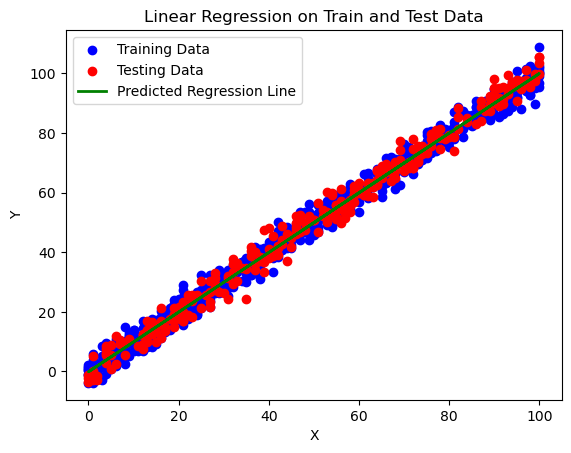

In [5]:
# 학습 데이터 시각화
plt.scatter(X_train, y_train, color='blue', label='Training Data')
# 테스트 데이터와 예측 결과 시각화
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Predicted Regression Line')

plt.title('Linear Regression on Train and Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
